# 라이브러리 추가

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from collections import Counter

# 파일 읽어오기   
* 파일 경로를 가져온다.
    * 만약 google drive를 통해 파일을 가져온다면 아래와 같이 파일 경로를 찾아 오자.
    * `!find /content/drive/MyDrive/ -name metadata.json`

In [8]:
file_path = input("file path plz :)(metadata.json) >>")
meta_data = pd.read_json(file_path, lines=True)

meta_data.head(5)

,magazine_id,user_id,title,keyword_list,display_url,sub_title,reg_ts,article_id,id
0,8982,@bookdb,"사진으로 옮기기에도 아까운, 리치필드 국립공원","[여행, 호주, 국립공원]",https://brunch.co.kr/@bookdb/782,세상 어디에도 없는 호주 Top 10,1474944427000,782,@bookdb_782
1,12081,@kohwang56,[시] 서러운 봄,"[목련꽃, 아지랑이, 동행]",https://brunch.co.kr/@kohwang56/81,,1463092749000,81,@kohwang56_81
2,0,@hannahajink,무엇을 위해,[],https://brunch.co.kr/@hannahajink/4,무엇 때문에,1447997287000,4,@hannahajink_4
3,16315,@bryceandjuli,싫다,"[감정, 마음, 위로]",https://brunch.co.kr/@bryceandjuli/88,,1491055161000,88,@bryceandjuli_88
4,29363,@mijeongpark,Dubliner#7,"[유럽여행, 더블린, 아일랜드]",https://brunch.co.kr/@mijeongpark/34,#7. 내 친구의 집은 어디인가,1523292942000,34,@mijeongpark_34


* metadata.json: 글의 메타데이터

  * 643,104 줄로 구성된 글의 메타데이터입니다.
  * 이 메타데이터에는 2018년 10월 1일부터 2019년 3월 14일까지 독자들이 본 글에 대한 정보입니다.
  * 작가가 비공개로 전환하였거나 삭제 등의 이유로 학습 데이터로 제공된 2018년 10월 1일부터 2019년 3월 1일 전까지의 본 글 정보에는 이 메타데이터에 없는 글이 있을 수 있습니다.
    * 개발 데이터와 평가 데이터에 포함된 글의 메타데이터도 포함되어 있습니다. 즉, 평가 대상자들이 2019년 3월 1일부터 2019년 3월 14일 사이에 본 모든 글에 대한 정보가 포함되어 있습니다.
  * 필드 설명
    * magazine_id: 이 글의 브런치 매거진 아이디 (없을 시는 0) `8982`
    * reg_ts: 이 글이 등록된 시간(유닉스 시간, 밀리초)
    * user_id: 작가 아이디  `@kohwang56`
    * article_id: 글 번호
    * id: 글 식별자
    * title: 제목
    * sub_title: 부제목
    * display_url: 웹 주소
    * keyword_list: 작가가 부여한 글의 태그 정보
  * 메타데이터의 모든 정보는 작가의 비공개 여부 전환, 글 삭제, 수정 등으로 유효하지 않거나 변동될 수 있습니다.


# describe

In [9]:
meta_data.describe()

,magazine_id,reg_ts,article_id
count,643104.000000,6.431040e+05,643104.000000
mean,14116.526335,1.504115e+12,160.443435
std,13571.716870,3.968517e+10,327.465368
min,0.000000,0.000000e+00,1.000000
25%,0.000000,1.475986e+12,18.000000
50%,11094.000000,1.508439e+12,56.000000
75%,24971.000000,1.534225e+12,158.000000
max,47576.000000,1.554044e+12,4224.000000


# magazine_id

In [10]:
magazine_id = meta_data.groupby(["magazine_id"]).count().sort_values("user_id", ascending=False).reset_index()[["magazine_id","user_id"]]
magazine_id.columns = ['magazine_id', 'count']

magazine_id.head(5)

,magazine_id,count
0,0,160823
1,17646,2430
2,12899,1417
3,12902,1300
4,13542,1279


In [11]:
magazine_id.describe()

,magazine_id,count
count,28028.000000,28028.000000
mean,23432.400849,22.945055
std,13285.612894,961.348331
min,0.000000,1.000000
25%,11970.750000,3.000000
50%,23877.000000,8.000000
75%,35157.750000,18.000000
max,47576.000000,160823.000000


In [12]:
magazine_id.drop(0).describe()

,magazine_id,count
count,28027.000000,28027.000000
mean,23433.236914,17.207728
std,13285.112553,39.941296
min,68.000000,1.000000
25%,11971.500000,3.000000
50%,23878.000000,8.000000
75%,35158.500000,18.000000
max,47576.000000,2430.000000


mazagine_id 0

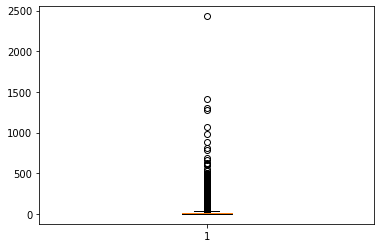

In [27]:
plt.boxplot(magazine_id['count'].drop(0))
plt.show()

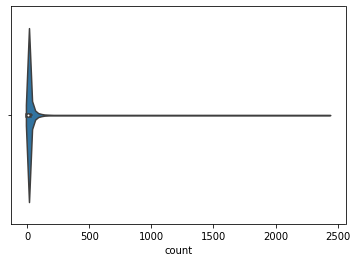

In [28]:
sns.violinplot(x=magazine_id['count'].drop(0))
plt.show()

# user_id

In [13]:
user_id = meta_data.groupby(["user_id"]).count().sort_values("magazine_id", ascending=False).reset_index()[["user_id","magazine_id"]]
user_id.columns = ["user_id","count"]

user_id.head(5)

,user_id,count
0,@bookfit,4106
1,@wikitree,3192
2,@jordan777,2797
3,@hitchwill,2115
4,@tenbody,1759


In [32]:
user_id.describe()

,count
count,19065.000000
mean,33.732179
std,87.706369
min,1.000000
25%,4.000000
50%,11.000000
75%,31.000000
max,4106.000000


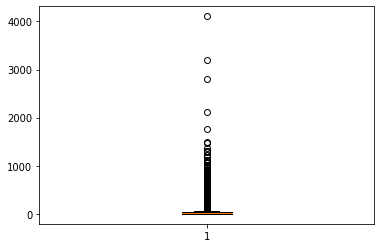

In [34]:
plt.boxplot(user_id['count'])
plt.show()

# keyword_list

In [15]:
keyword_list = pd.DataFrame(Counter([j for i in meta_data["keyword_list"].tolist() for j in i]).most_common())
keyword_list.columns = ["keyword","count"]

keyword_list.head(5)

,keyword,count
0,여행,33887
1,영화,27058
2,사랑,25177
3,에세이,17629
4,그림일기,15806


In [16]:
keyword_list.describe()

,count
count,86037.000000
mean,19.192929
std,258.995070
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,33887.000000


# keyword_list [] 제거

In [17]:
meta_data["keyword_list"] = meta_data["keyword_list"].apply(lambda x: "" if x == [] else x)

In [18]:
metadata_x = meta_data[meta_data["keyword_list"]==""]

metadata_x

,magazine_id,user_id,title,keyword_list,display_url,sub_title,reg_ts,article_id,id
2,0,@hannahajink,무엇을 위해,,https://brunch.co.kr/@hannahajink/4,무엇 때문에,1447997287000,4,@hannahajink_4
18,4104,@roke,고백하지 못할 고백,,https://brunch.co.kr/@roke/70,My darling child,1455431436000,70,@roke_70
29,11698,@pencil-k,[작심361일차] 건너뛰기,,https://brunch.co.kr/@pencil-k/478,D-4,1499672775000,478,@pencil-k_478
43,1729,@skyzakard,촉촉한 눈시울로 '내 삶'을 돌아봤습니다...,,https://brunch.co.kr/@skyzakard/73,"개인의 눈으로 바라본 1차 세계대전, <발리언트 하츠: 더 그레이트 워",1446125947000,73,@skyzakard_73
47,4542,@sooband,학교의 진화 다큐 OST 작업기,,https://brunch.co.kr/@sooband/60,,1449730053000,60,@sooband_60
...,...,...,...,...,...,...,...,...,...
642981,0,@tel1638,3.1운동 100주년을 앞두고,,https://brunch.co.kr/@tel1638/134,어쨌든 지금은 이전 시대보다 정의롭다.,1544014144000,134,@tel1638_134
642998,0,@btest,피드테스트2,,https://brunch.co.kr/@btest/182,,1460080620000,182,@btest_182
643016,43278,@geehyonee,당신의 브랜드는 무엇을 말하고 있나요,,https://brunch.co.kr/@geehyonee/17,Find your why.,1541082784000,17,@geehyonee_17
643058,41903,@pink5528,대학에 오고 나서 꿈을 잃어버렸다,,https://brunch.co.kr/@pink5528/4,내가 휴학을 결심하게 된 이유,1547913735000,4,@pink5528_4


keyword가 없는 문서 수 : 70065

In [19]:
metadata_o = meta_data[meta_data["keyword_list"]!=""]

metadata_o

,magazine_id,user_id,title,keyword_list,display_url,sub_title,reg_ts,article_id,id
0,8982,@bookdb,"사진으로 옮기기에도 아까운, 리치필드 국립공원","[여행, 호주, 국립공원]",https://brunch.co.kr/@bookdb/782,세상 어디에도 없는 호주 Top 10,1474944427000,782,@bookdb_782
1,12081,@kohwang56,[시] 서러운 봄,"[목련꽃, 아지랑이, 동행]",https://brunch.co.kr/@kohwang56/81,,1463092749000,81,@kohwang56_81
3,16315,@bryceandjuli,싫다,"[감정, 마음, 위로]",https://brunch.co.kr/@bryceandjuli/88,,1491055161000,88,@bryceandjuli_88
4,29363,@mijeongpark,Dubliner#7,"[유럽여행, 더블린, 아일랜드]",https://brunch.co.kr/@mijeongpark/34,#7. 내 친구의 집은 어디인가,1523292942000,34,@mijeongpark_34
5,17646,@jordan777,"지식·기술이 가장 경쟁력 있는 자원이다 ""","[석유에너지, 베네수엘라, 경제]",https://brunch.co.kr/@jordan777/1334,,1515020397000,1334,@jordan777_1334
...,...,...,...,...,...,...,...,...,...
643099,38917,@uxstar,3D 지도의 내비게이션 제스처,"[3D, UI, 제스처]",https://brunch.co.kr/@uxstar/24,GIS 서비스,1553502554000,24,@uxstar_24
643100,28741,@reading15m,월간 경험수집 vol.6,"[독서모임, 경험수집, 글쓰기]",https://brunch.co.kr/@reading15m/575,,1540984479000,575,@reading15m_575
643101,19155,@hje3884,왜 참으라고만 해요?,"[생각, 에세이, 괴로움]",https://brunch.co.kr/@hje3884/118,공기 조차 함께 하고 싶지 않을 때,1509957398000,118,@hje3884_118
643102,37504,@julieleekgep,넌 오늘 뭘 봤니?,"[여행, 유럽여행, 리스본]",https://brunch.co.kr/@julieleekgep/12,"리스본, 길 위에서 만난 우정",1540993756000,12,@julieleekgep_12


keyword가 있는 문서 수 : 573039

In [20]:
metadata_o.head(10)

,magazine_id,user_id,title,keyword_list,display_url,sub_title,reg_ts,article_id,id
0,8982,@bookdb,"사진으로 옮기기에도 아까운, 리치필드 국립공원","[여행, 호주, 국립공원]",https://brunch.co.kr/@bookdb/782,세상 어디에도 없는 호주 Top 10,1474944427000,782,@bookdb_782
1,12081,@kohwang56,[시] 서러운 봄,"[목련꽃, 아지랑이, 동행]",https://brunch.co.kr/@kohwang56/81,,1463092749000,81,@kohwang56_81
3,16315,@bryceandjuli,싫다,"[감정, 마음, 위로]",https://brunch.co.kr/@bryceandjuli/88,,1491055161000,88,@bryceandjuli_88
4,29363,@mijeongpark,Dubliner#7,"[유럽여행, 더블린, 아일랜드]",https://brunch.co.kr/@mijeongpark/34,#7. 내 친구의 집은 어디인가,1523292942000,34,@mijeongpark_34
5,17646,@jordan777,"지식·기술이 가장 경쟁력 있는 자원이다 ""","[석유에너지, 베네수엘라, 경제]",https://brunch.co.kr/@jordan777/1334,,1515020397000,1334,@jordan777_1334
6,7164,@m-life,유치권 심문기일,"[입찰, 유치권, 부동산경매변호사]",https://brunch.co.kr/@m-life/283,2007년 10월 8일 월요일,1476023411000,283,@m-life_283
7,9963,@hohogg,(過去)Rain,"[사랑, 연애, rain]",https://brunch.co.kr/@hohogg/131,꼬꼬마의 글공간,1506150459000,131,@hohogg_131
8,28849,@elang8151,출간제의 받았습니다.,"[메일, 출판사]",https://brunch.co.kr/@elang8151/229,미안하지만 아직 학생입니다.,1539405177000,229,@elang8151_229
9,0,@purnbd,동시빵가게,"[도시애벌레, 공부, 동시]",https://brunch.co.kr/@purnbd/9,8. 동시빵 맛보기-'도시 애벌레',1505691085000,9,@purnbd_9
10,39727,@hukho,같은 물건의 다른 삶,"[패션, 에세이, 경제]",https://brunch.co.kr/@hukho/247,MD의 꽃점,1551798000000,247,@hukho_247
